In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import networkx as nx
from sklearn import cluster
from scipy.cluster import hierarchy
import seaborn as sns
import csv

# Ligand Clustering Set-up:
    
Takes in a matrix of ligand comparison values. Sets up a histogram of all of the similarity values. It then set a cutoff value and sets all values below the cutoff to 0. Finally, it sets up a clustering of the ligands using a networkX graph. 

In [2]:
ligandMatrix = pd.read_csv('./data/ligandComparisons.csv', index_col=0)

FileNotFoundError: [Errno 2] File ./data/ligandComparisons.csv does not exist: './data/ligandComparisons.csv'

In [ ]:
simVals = []
for row in ligandMatrix.index.values:
    for col in ligandMatrix.columns.values:
        simVals.append(ligandMatrix.loc[row, col]) 

In [ ]:
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(simVals, bins=40) #Sequence Values
plt.title('Ligand Similarity Histogram')
plt.xlabel('Counts')
plt.ylabel('Sequence Similarity')        
         
#Sum values across all comparisons 
lig_sums = ligandMatrix.sum(axis = 1) 
plt.subplot(1, 2, 2)
plt.hist(lig_sums, bins=400)
plt.title('Total similarity sums for each Ligand')
plt.xlabel('Sum of Similarities')
plt.ylabel('Counts')
plt.show()

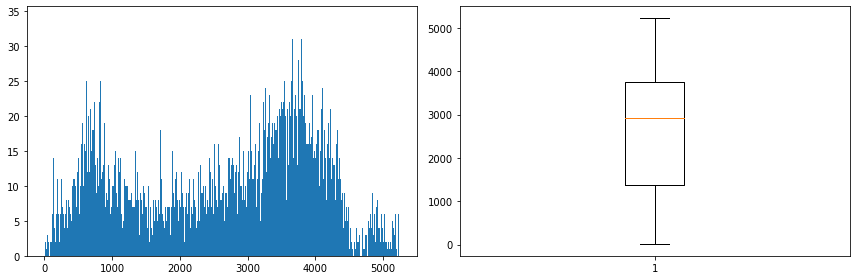

In [5]:
sparseLigandMatrix = pd.read_csv('./data/ligandComparisons.csv', index_col=0)

cutoff = np.median(simVals)
for col in sparseLigandMatrix.columns.values:
    a = np.array(sparseLigandMatrix[col].values.tolist())
    sparseLigandMatrix[col] = np.where(a < cutoff, 0, a).tolist()

#Get number of edges per element
lig_connections = sparseLigandMatrix.astype(bool).sum(axis=1)

plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(lig_connections, bins=500)
plt.subplot(1, 2, 2)
plt.boxplot(lig_connections)
plt.tight_layout()
plt.show()

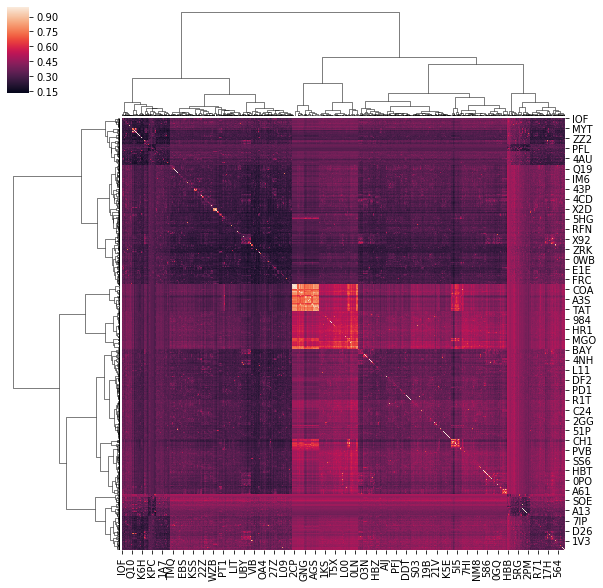

In [6]:
#Produce Clustering map - non-sparse
sns.clustermap(ligandMatrix, metric='euclidean', method='ward')

# Sequence Clustering Set-up:

Takes in a matrix of ligand comparison values and the same data in list form. Sets up a histogram of all of the similarity values. It then set a cutoff value and sets all values below the cutoff to 0. Finally, it sets up a clustering of the ligands using a networkX graph. 

In [7]:
# Create Matrix of Sequence Alignment Values
seqMatrix = pd.read_csv('./data/seqAlignMatrix.csv', index_col=0)

In [8]:
#Get all Sequence Alignment Values and plot histogram
seqVals = pd.read_csv('./data/seqAlignVals.txt', header=None)
seqVals = seqVals[[2]].values
seqVals = seqVals.flatten()

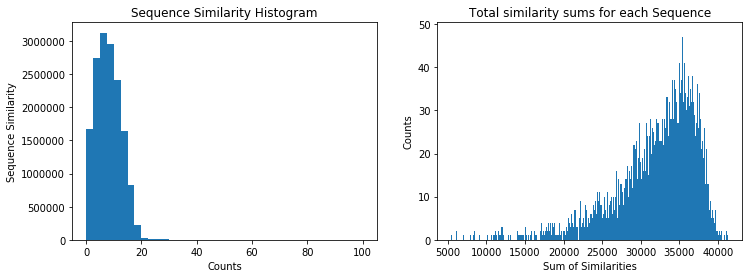

In [9]:
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(seqVals, bins=40) #Sequence Values
plt.title('Sequence Similarity Histogram')
plt.xlabel('Counts')
plt.ylabel('Sequence Similarity')

sums = seqMatrix.sum(axis = 1) #Sum values across all comparisons
plt.subplot(1, 2, 2)
plt.hist(sums, bins=400)
plt.title('Total similarity sums for each Sequence')
plt.xlabel('Sum of Similarities')
plt.ylabel('Counts')
plt.show()

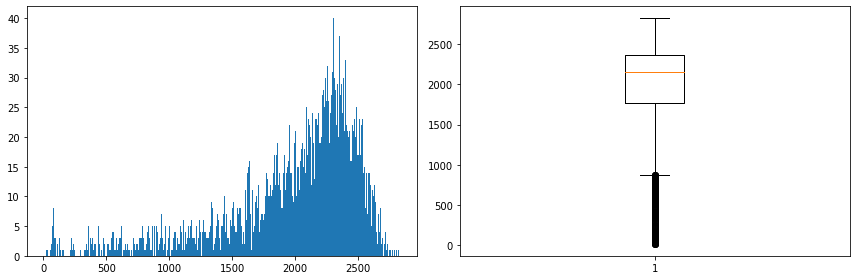

In [10]:
# Introduce more sparcity into new matrix of data by setting all values below cutoff to 0. 
sparseSeqMatrix = pd.read_csv('./data/seqAlignMatrix.csv', index_col=0)
cutoff = np.median(seqVals)
for col in sparseSeqMatrix.columns.values:
    a = np.array(sparseSeqMatrix[col].values.tolist())
    sparseSeqMatrix[col] = np.where(a < cutoff, 0, a).tolist()

#Get number of edges per element - Must happen after increasing sparcity
seq_connections = sparseSeqMatrix.astype(bool).sum(axis=1)
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(seq_connections, bins=500)
plt.subplot(1, 2, 2)
plt.boxplot(seq_connections)
plt.tight_layout()
plt.show()

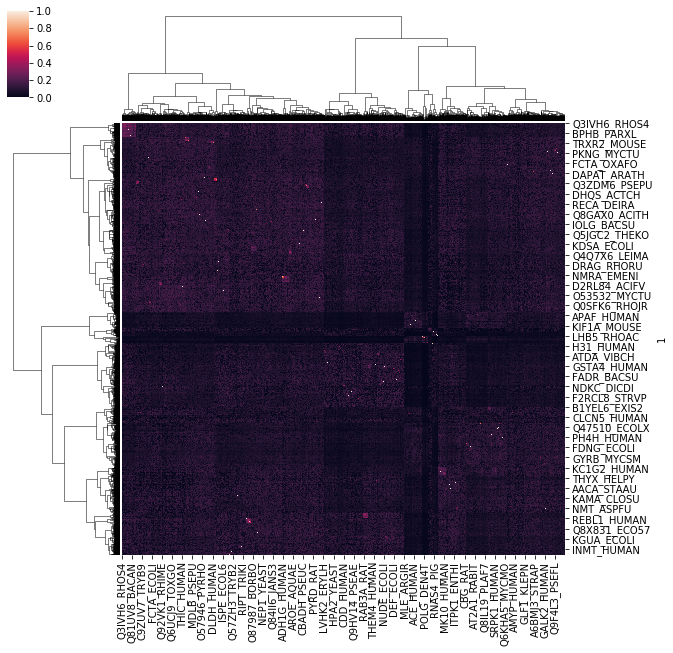

In [11]:
#Produce Clustering map of original sequence values (non-sparse)
sns.clustermap(seqMatrix, metric='euclidean', method='ward', standard_scale=1)

# PocketFEATURE Clustering Set-up:

Takes in a matrix of ligand comparison values and the same data in list form. Sets up a histogram of all of the similarity values. It then set a cutoff value and sets all values below the cutoff to 0. Finally, it sets up a clustering of the ligands using a networkX graph. 

In [13]:
pf = pd.read_csv('./data/fullPFCol1Matrix.csv', index_col=0)

In [14]:
#Get all PocketFeature Scores
pfVals = pd.read_csv('./data/pocket_feature_scores.csv', header=None)
pfVals = pfVals[[2]].values
pfVals = pfVals.flatten()

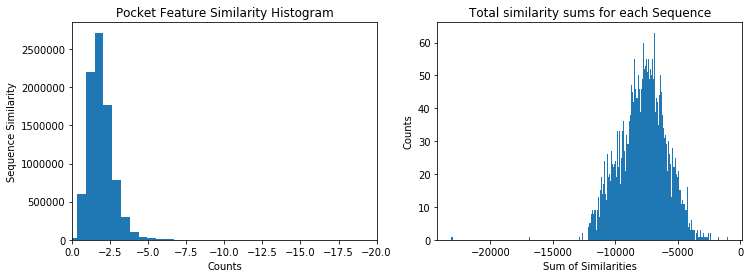

In [15]:
#Plot histogram of all pocketFEATURE scores. 
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(pfVals, bins=800)
plt.xlim(0, -20)
plt.title('Pocket Feature Similarity Histogram')
plt.xlabel('Counts')
plt.ylabel('Sequence Similarity')

pf_sums = pf.sum(axis = 1)
plt.subplot(1, 2, 2)
plt.hist(pf_sums, bins=400)
plt.title('Total similarity sums for each Sequence')
plt.xlabel('Sum of Similarities')
plt.ylabel('Counts')
plt.show()

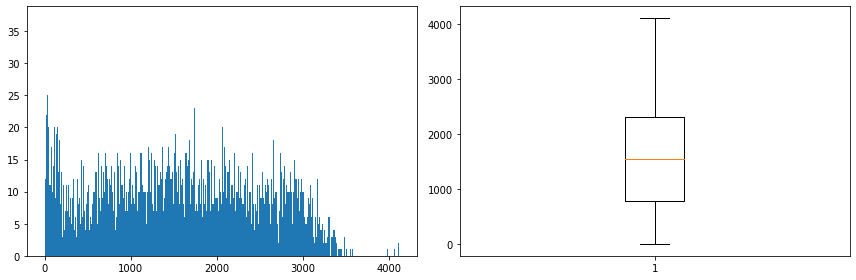

In [16]:
#Set all entries with empty value or value greater than -2 to 0 to introduce sparcity 
pf = pf.fillna(0)
sparsePF = pd.read_csv('./data/fullPFCol1Matrix.csv', index_col=0)
sparsePF = sparsePF.fillna(0)
cutoff = -2.0
for col in sparsePF.columns.values:
    a = np.array(sparsePF[col].values.tolist())
    sparsePF[col] = np.where(a > cutoff, 0, a).tolist()

#Get number of edges per element - Must happen after increasing sparcity
pf_connections = sparsePF.astype(bool).sum(axis=1)
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(pf_connections, bins=500)
plt.subplot(1, 2, 2)
plt.boxplot(pf_connections)
plt.tight_layout()
plt.show()

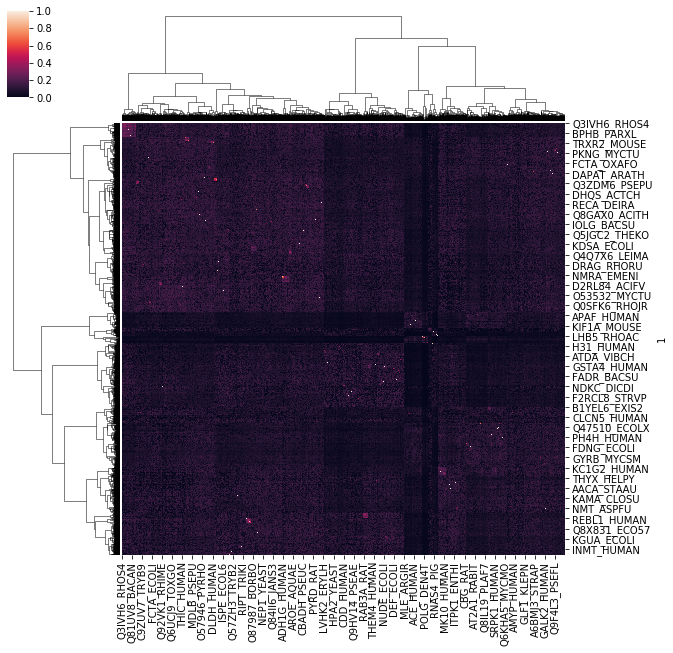

In [17]:
#Produce Clustering map - non-sparse
sns.clustermap(seqMatrix, metric='euclidean', method='ward', standard_scale=1)